In [1]:
import numpy as np
import pandas as pd
import calendar
import statsmodels.formula.api as smf
from scipy.stats import ttest_1samp
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
wm_df = pd.read_csv('Walmart_Store_sales.csv')
wm_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
wm_df.describe()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
wm_df.shape

(6435, 8)

__Basic Statistics tasks__

Which store has maximum sales ?
Store with maximum Sales: 14, with Sales:3818686.45


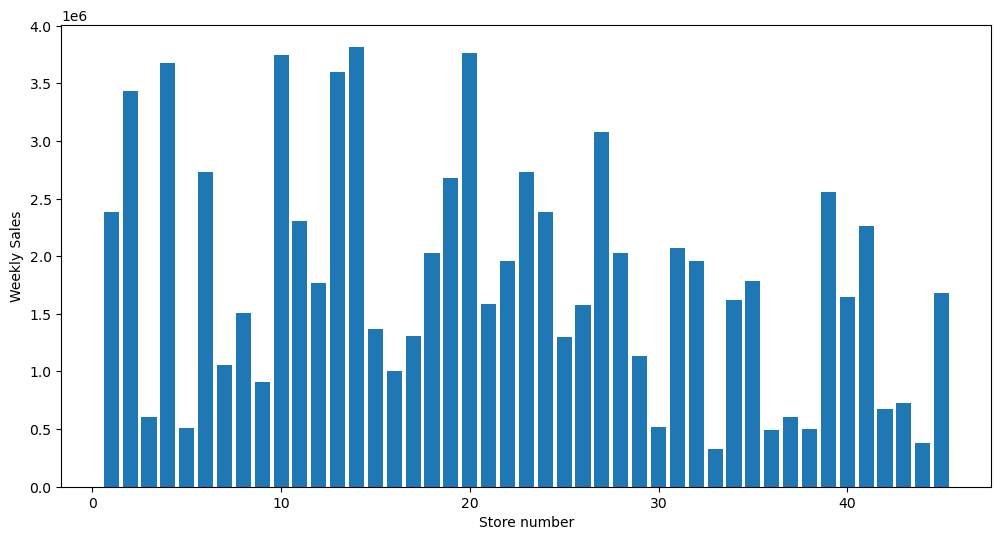

In [655]:
# Which store has maximum sales

store_sale_max_data = wm_df[wm_df['Weekly_Sales'] == max(wm_df['Weekly_Sales'])]
print('Which store has maximum sales ?')
print(f'Store with maximum Sales: {store_sale_max_data.iloc[0]['Store']}, with Sales:{store_sale_max_data.iloc[0]['Weekly_Sales']}')
fig = plt.figure(figsize=(12,6))
#sns.boxplot(x='Store', y='Weekly_Sales', data=wm_df)#, ax=ax)
plt.bar(wm_df['Store'], wm_df['Weekly_Sales'])
plt.xlabel('Store number')
plt.ylabel('Weekly Sales')
plt.show()

In [451]:
# Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

#wm_df['Date'] = pd.to_datetime(wm_df['Date'])
#wm_df['std_sales'] = wm_df.apply(lambda x: np.divide(np.square(x['Weekly_Sales'] - std), (count - 1)), axis=1)
wm_df['std_sales'] = wm_df['Weekly_Sales'].expanding(2).std(ddof=0).reset_index()['Weekly_Sales']
max_std = wm_df['std_sales'].idxmax()
print('Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation')
print(f'The Store with maximum standard deviation is : {wm_df.iloc[max_std]['Store']} with Standard Deviation : {wm_df.iloc[max_std]['std_sales']}')

mean = wm_df.iloc[max_std]['Weekly_Sales'].mean()

print(f'Coefficient of mean to standard deviation is : {np.divide(mean, wm_df.iloc[max_std]['std_sales'])}')

index:RangeIndex(start=0, stop=6435, step=1)
Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
The Store with maximum standard deviation is : 5 with Standard Deviation : 775063.510758838
Coefficient of mean to standard deviation is : 0.4122897873067703


In [79]:
q3_2012_df = wm_df[(wm_df['Date'] >= '01-07-2012') & (wm_df['Date'] <= '30-09-2012')]
q3_2012_df.head()
print(q3_2012_df.dtypes)

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
std_sales       float64
dtype: object


In [491]:
# Which store/s has good quarterly growth rate in Q3’2012

#q3_2012_df['Date'] = pd.to_datetime(q3_2012_df['Date'], dayfirst=True)
#print(q3_2012_df.dtypes)
wm_df['Date'] = pd.to_datetime(wm_df['Date'], dayfirst=True)
q2_sales = wm_df[wm_df['Date'].dt.quarter == 2].groupby('Store')['Weekly_Sales'].sum()
q3_sales = wm_df[wm_df['Date'].dt.quarter == 3].groupby('Store')['Weekly_Sales'].sum()
#print(f'q3 sales: {q3_sales}  q2 sales: {q2_sales}')
q2_q3_sales= pd.merge(q2_sales, q3_sales, on='Store', suffixes=('_Q2', '_Q3'))
q2_q3_sales['Growth_Rate'] = (q2_q3_sales['Weekly_Sales_Q3'] - q2_q3_sales['Weekly_Sales_Q2'])/q2_q3_sales['Weekly_Sales_Q2'] * 100
sorted_growth = q2_q3_sales[['Growth_Rate']].sort_values(by="Growth_Rate", ascending=False)
print('Which store/s has good quarterly growth rate in Q3’2012')
print(f'The Store with Highest growth rate in Q3 is {sorted_growth.idxmax()}, with Growth rate of :{sorted_growth.max()}')


Which store/s has good quarterly growth rate in Q3’2012
The Store with Highest growth rate in Q3 is Growth_Rate    7
dtype: int64, with Growth rate of :Growth_Rate    24.830237
dtype: float64


Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
Holiday Date when sales were more than non-holiday date is :2011-11-25 00:00:00 with Sales: 3004702.33


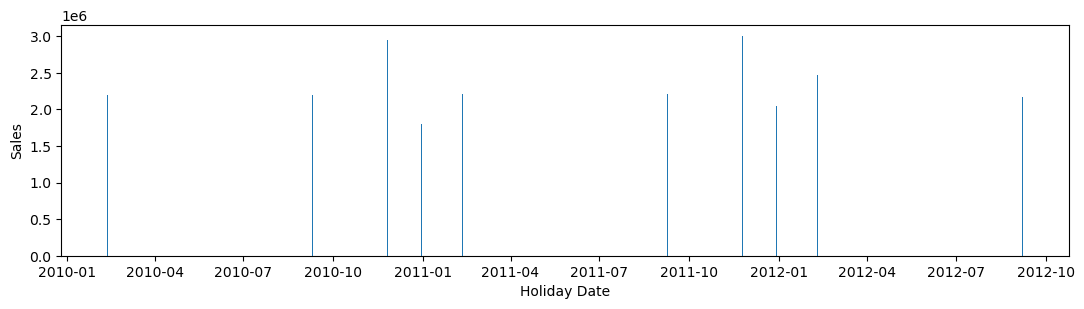

In [563]:
# Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together


non_holiday_sale = wm_df[wm_df['Holiday_Flag']==0][['Weekly_Sales', 'Date']]
non_holiday_sale_mean = non_holiday_sale.mean()

holiday_sale = wm_df[wm_df['Holiday_Flag']==1][['Weekly_Sales', 'Date']]
sorted_holiday_sale = holiday_sale[holiday_sale > non_holiday_sale_mean].sort_values(by='Weekly_Sales', ascending=False)
print('Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together')
print(f'Holiday Date when sales were more than non-holiday date is :{sorted_holiday_sale.iloc[0]['Date']} with Sales: {sorted_holiday_sale.iloc[0]['Weekly_Sales']}')

fig = plt.figure(figsize=(13,3))
plt.bar(holiday_sale['Date'], holiday_sale['Weekly_Sales'], align='center', width=1.3)
plt.xlabel('Holiday Date')
plt.ylabel('Sales')
plt.show()

Highest Sale during month: Month:July and sales: 650000977.25
Lowest Sale during semester: Month:January and sales: 332598438.49

Highest Sale during month: Semester:2.0 and sales: 3416491513.13
Lowest Sale during semester: Month:1.0 and sales: 3320727473.98


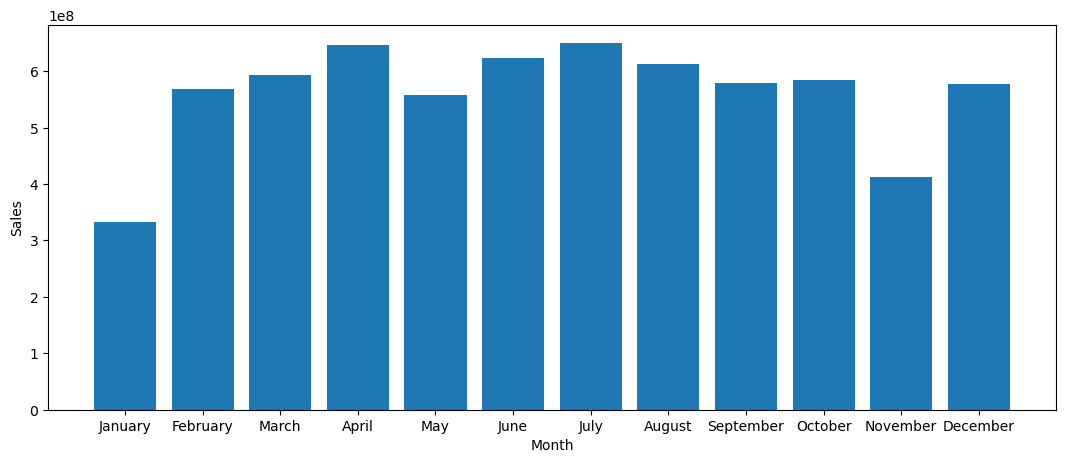

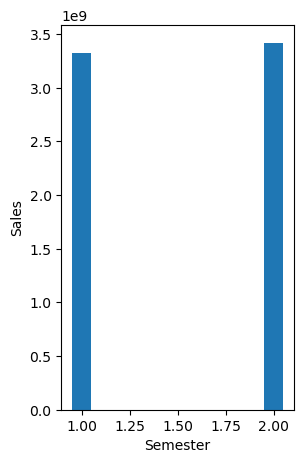

In [651]:
# Provide a monthly and semester view of sales in units and give insights


wm_df['Month'] = wm_df['Date'].dt.month
wm_df['Semester'] = wm_df['Month'].apply(lambda x: 1 if x <= 6 else 2)

month_sale = wm_df.groupby('Month')['Weekly_Sales'].sum().reset_index()
month_sale['Month_Name'] = month_sale['Month'].apply(lambda x: calendar.month_name[x])
#print(f'{month_sale.head()}')


sem_sale = wm_df.groupby('Semester')['Weekly_Sales'].sum().reset_index()
#print(f'{sem_sale}')

print(f'Highest Sale during month: Month:{month_sale.loc[month_sale['Weekly_Sales'].idxmax()]['Month_Name']} and sales: {month_sale.loc[month_sale['Weekly_Sales'].idxmax()]['Weekly_Sales']}')
print(f'Lowest Sale during semester: Month:{month_sale.loc[month_sale['Weekly_Sales'].idxmin()]['Month_Name']} and sales: {month_sale.loc[month_sale['Weekly_Sales'].idxmin()]['Weekly_Sales']}')

print(f'\nHighest Sale during month: Semester:{sem_sale.loc[sem_sale['Weekly_Sales'].idxmax()]['Semester']} and sales: {sem_sale.loc[sem_sale['Weekly_Sales'].idxmax()]['Weekly_Sales']}')
print(f'Lowest Sale during semester: Month:{sem_sale.loc[sem_sale['Weekly_Sales'].idxmin()]['Semester']} and sales: {sem_sale.loc[month_sale['Weekly_Sales'].idxmin()]['Weekly_Sales']}')

fig = plt.figure(figsize=(13,5))
plt.bar(month_sale['Month_Name'], month_sale['Weekly_Sales'], align='center')

plt.xlabel('Month')
plt.ylabel('Sales')

plt.show()
fig = plt.figure(figsize=(3,5))
plt.bar(sem_sale['Semester'], sem_sale['Weekly_Sales'], align='center', width=0.1)
plt.xlabel('Semester')
plt.ylabel('Sales')
plt.show()

__Statistical Model__

In [288]:
# check for any null
wm_df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
std_sales       1
Month           0
Semester        0
dtype: int64

In [290]:
wm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   std_sales     6434 non-null   float64       
 9   Month         6435 non-null   int32         
 10  Semester      6435 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int32(1), int64(3)
memory usage: 528.0 KB


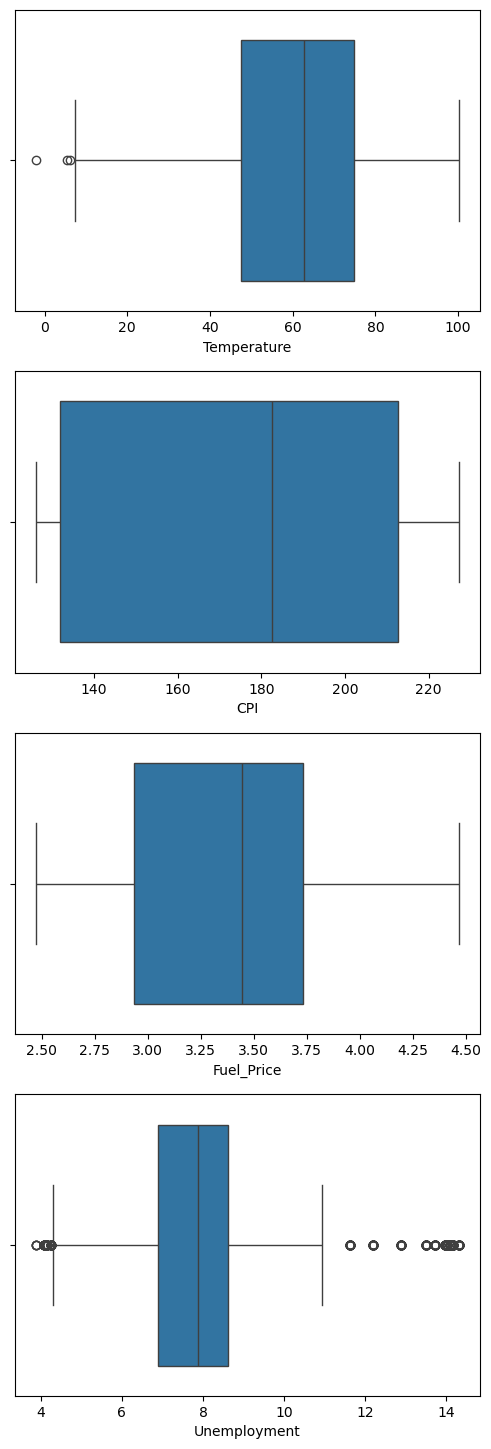

In [571]:
# Find the outliners
alpha = 0.05


fig, axs = plt.subplots(4, figsize=(6,18))
cols = wm_df[['Temperature', 'CPI', 'Fuel_Price', 'Unemployment']]
for i, column in enumerate(cols):
    sns.boxplot(x=wm_df[column], ax=axs[i])
    #sns.boxplot(wm_df[column])

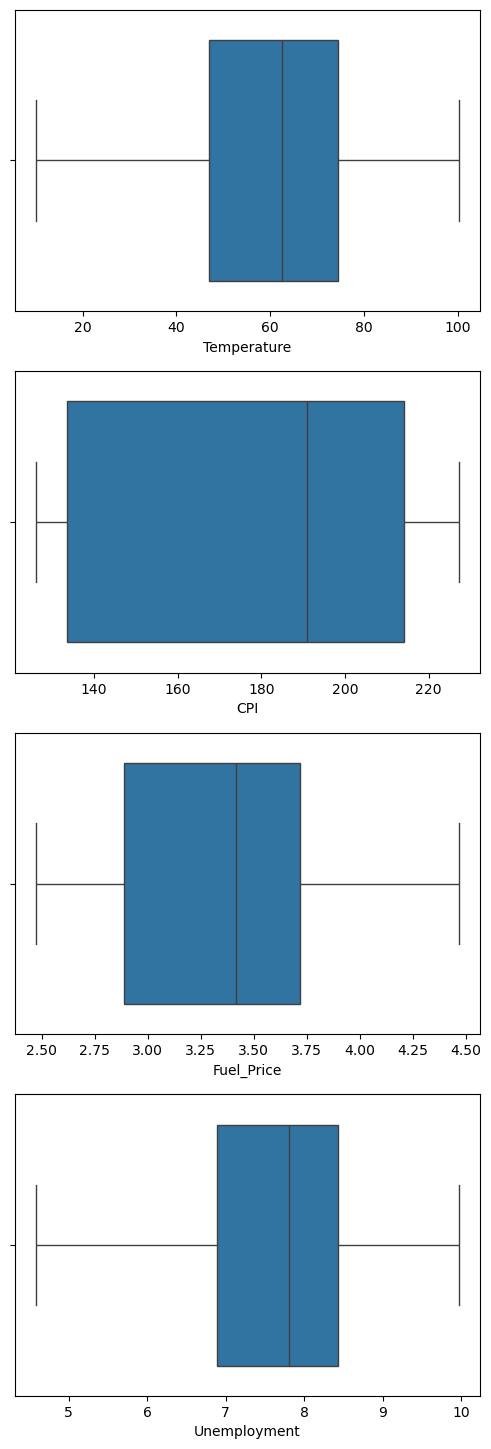

In [589]:
# remove outliners from Temperature and Unemployment
wm_df_clean = wm_df[(wm_df['Unemployment'] < 10) & (wm_df['Unemployment'] > 4.5) & (wm_df['Temperature'] > 10)]
cols = wm_df_clean[['Temperature', 'CPI', 'Fuel_Price', 'Unemployment']]
wm_df_clean
fig, axs = plt.subplots(4, figsize=(6,18))
for i, column in enumerate(cols):
    sns.boxplot(x=wm_df_clean[column], ax=axs[i])
    

In [368]:

earliest_date = wm_df[wm_df['Store']==1]['Date'].min()
#print(f'{earliest_date}')
wm_df['date_index'] = (wm_df['Date'] - earliest_date).dt.days + 1
#print(f'{wm_df['date_index']}')
wm_df.head()
# finding diff between dependent var and independent var
formula = 'Weekly_Sales ~ date_index + CPI+ Unemployment + Fuel_Price + Temperature'

model = smf.ols(formula, data=wm_df).fit()
print(model.summary())

2010-02-05 00:00:00
                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     32.24
Date:                Wed, 28 May 2025   Prob (F-statistic):           1.42e-32
Time:                        12:56:53   Log-Likelihood:                -94272.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6429   BIC:                         1.886e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.698e+06   9.

In [303]:
wm_df.corr()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,std_sales,Month,Semester,date_index
Store,1.000000e+00,1.577299e-13,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,-0.070074,2.910676e-15,-6.588451e-16,-2.939901e-16
Date,1.577299e-13,1.000000e+00,0.006949,-1.328524e-02,0.145357,0.771444,0.077157,-0.248203,0.026322,1.456512e-01,1.616174e-01,1.000000e+00
Weekly_Sales,-3.353320e-01,6.949360e-03,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-0.114033,7.614332e-02,3.934578e-02,6.949360e-03
Holiday_Flag,-4.386841e-16,-1.328524e-02,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-0.000164,1.229958e-01,1.116019e-01,-1.328524e-02
Temperature,-2.265908e-02,1.453566e-01,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,-0.092716,2.358618e-01,2.901447e-01,1.453566e-01
Fuel_Price,6.002295e-02,7.714439e-01,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,0.051936,-4.215590e-02,-7.681410e-02,7.714439e-01
CPI,-2.094919e-01,7.715746e-02,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,-0.122823,4.979672e-03,5.559948e-03,7.715746e-02
Unemployment,2.235313e-01,-2.482029e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-0.093358,-1.274559e-02,-2.232654e-02,-2.482029e-01
std_sales,-7.007402e-02,2.632240e-02,-0.114033,-1.639343e-04,-0.092716,0.051936,-0.122823,-0.093358,1.000000,-3.150400e-05,4.516703e-04,2.632240e-02
Month,2.910676e-15,1.456512e-01,0.076143,1.229958e-01,0.235862,-0.042156,0.004980,-0.012746,-0.000032,1.000000e+00,8.605206e-01,1.456512e-01


pop: 60.66378243978244 and samp: 68.30678321678322
 stat for temperature: 6.413605370696808 and p-value: 1.973668052280381e-09
Reject the null hypotenus - temperature has no impact on sales
--------------------------------------------------
 stat for fuel: -3.8873014081545487 and p-value: 0.0001550493468541749
Reject the null hypotenus - Fuel price has no impact on sales
--------------------------------------------------
 stat for cpi: 122.08260144070684 and p-value: 1.102320523075156e-145
Reject the null hypotenus - CPI has no impact on sales
--------------------------------------------------
 stat for temperature: -12.113528318765969 and p-value: 1.2186500060955787e-23
Reject the null hypotenus - Unemployment has no impact on sales
--------------------------------------------------


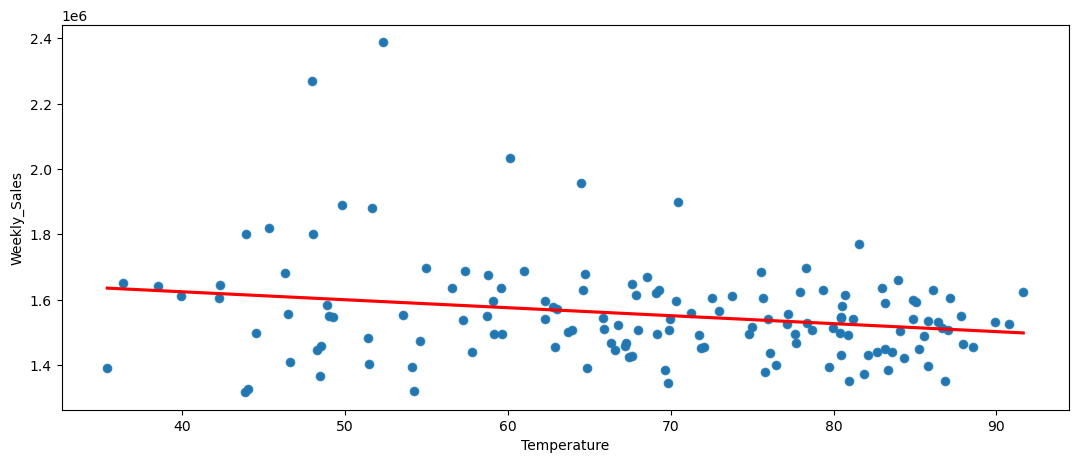

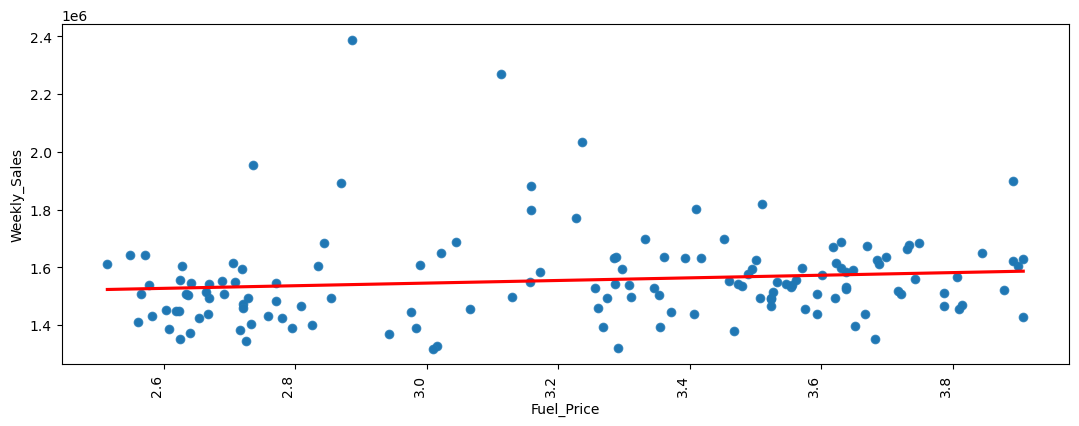

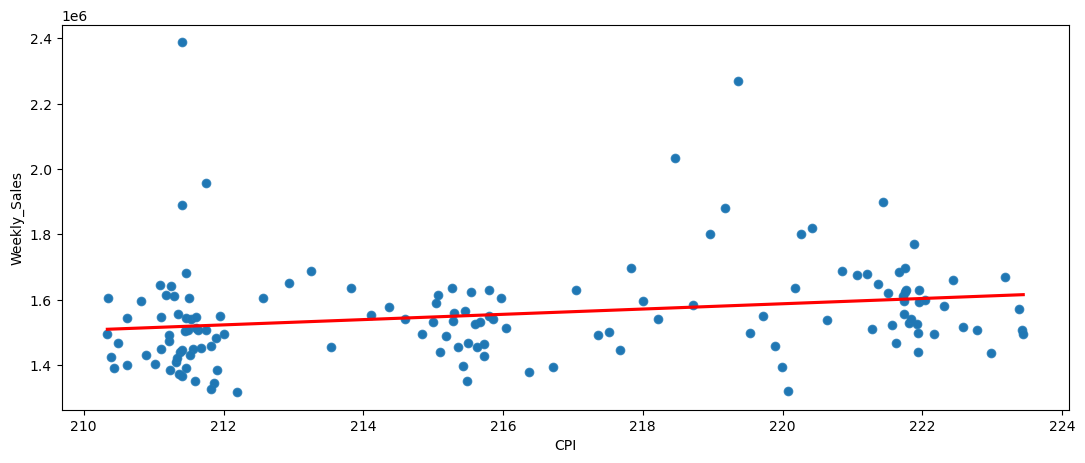

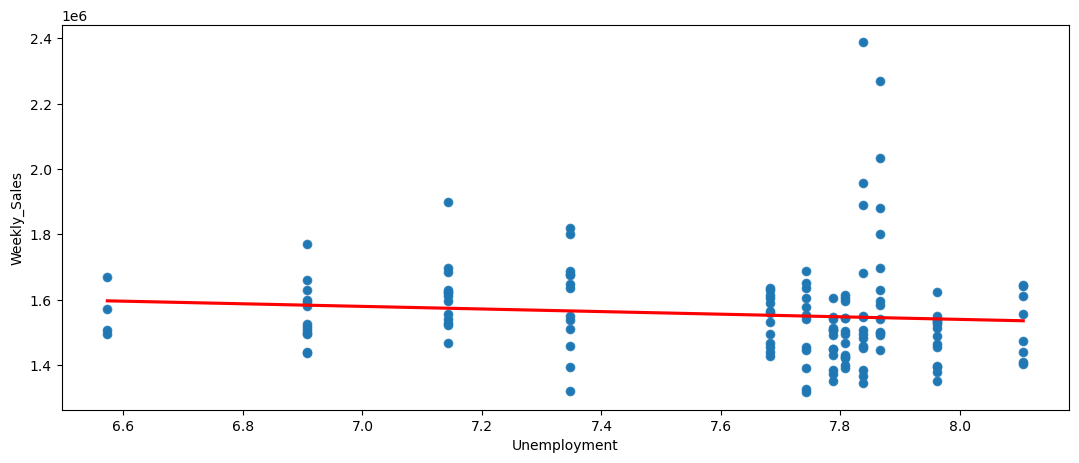

In [659]:
# H0 - Temperature has no impact on Sales

alpha = 0.05
pop_mean_temp = wm_df['Temperature'].mean()
samp_mean_temp = wm_df[wm_df['Store']==1]['Temperature'].mean()
print(f'pop: {pop_mean_temp} and samp: {samp_mean_temp}')

ttest_stat_temp, pval_temp = ttest_1samp(wm_df[wm_df['Store']==1]['Temperature'], pop_mean_temp)
print(f' stat for temperature: {ttest_stat_temp} and p-value: {pval_temp}')

if pval_temp > alpha:
    print(f'Accept the null hypotenus - temperature has no impact on sales')
else:
    print(f'Reject the null hypotenus - temperature has no impact on sales')
print('-'*50)

ttest_stat_fuel, pval_fuel = ttest_1samp(wm_df[wm_df['Store']==1]['Fuel_Price'],  wm_df['Fuel_Price'].mean())
print(f' stat for fuel: {ttest_stat_fuel} and p-value: {pval_fuel}')

if pval_fuel > alpha:
    print(f'Accept the null hypotenus - Fuel price has no impact on sales')
else:
    print(f'Reject the null hypotenus - Fuel price has no impact on sales')
print('-'*50)

ttest_stat_cpi, pval_cpi = ttest_1samp(wm_df[wm_df['Store']==1]['CPI'],  wm_df['CPI'].mean())
print(f' stat for cpi: {ttest_stat_cpi} and p-value: {pval_cpi}')

if pval_cpi > alpha:
    print(f'Accept the null hypotenus - CPI has no impact on sales')
else:
    print(f'Reject the null hypotenus - CPI has no impact on sales')
print('-'*50)


ttest_stat_unemp, pval_unemp = ttest_1samp(wm_df[wm_df['Store']==1]['Unemployment'],  wm_df['Unemployment'].mean())
print(f' stat for temperature: {ttest_stat_unemp} and p-value: {pval_unemp}')

if pval_unemp > alpha:
    print(f'Accept the null hypotenus - Unemployment has no impact on sales')
else:
    print(f'Reject the null hypotenus - Unemployment has no impact on sales')
print('-'*50)

# Visualization
fig = plt.figure(figsize=(13,5))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=wm_df[wm_df['Store']==1])
sns.regplot(x=wm_df[wm_df['Store']==1]['Temperature'], y=wm_df[wm_df['Store']==1]['Weekly_Sales'], ci=False, line_kws={'color': 'red'})
plt.show()

fig = plt.figure(figsize=(13,5))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=wm_df[wm_df['Store']==1])
fig.autofmt_xdate(rotation=90)
sns.regplot(x=wm_df[wm_df['Store']==1]['Fuel_Price'], y=wm_df[wm_df['Store']==1]['Weekly_Sales'], ci=False, line_kws={'color': 'red'})
#sns.pairplot(data=wm_df[wm_df['Store']==1])
plt.show()

fig = plt.figure(figsize=(13,5))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=wm_df[wm_df['Store']==1])
sns.regplot(x=wm_df[wm_df['Store']==1]['CPI'], y=wm_df[wm_df['Store']==1]['Weekly_Sales'], ci=False, line_kws={'color': 'red'})
plt.show()

fig = plt.figure(figsize=(13,5))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=wm_df[wm_df['Store']==1])
sns.regplot(x=wm_df[wm_df['Store']==1]['Unemployment'], y=wm_df[wm_df['Store']==1]['Weekly_Sales'], ci=False, line_kws={'color': 'red'})
plt.show()

